### The Problem Statement

1. Regression: Prediction of bike rental count hourly or daily based on the environmental and seasonal settings.
2. Event and Anomaly Detection:  Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.



In [2]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import ElasticNet, Lasso,LassoCV, Ridge

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, AdaBoostRegressor,GradientBoostingRegressor, ExtraTreesRegressor, BaggingRegressor


from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline

from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb


from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

%matplotlib inline

In [3]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
#check non null
hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour.shape

(17379, 17)

In [8]:
#check number of unique values
for column in hour.columns:
    print('{:<20}{:>20}'.format(column,len(hour[column].unique())))

instant                            17379
dteday                               731
season                                 4
yr                                     2
mnth                                  12
hr                                    24
holiday                                2
weekday                                7
workingday                             2
weathersit                             4
temp                                  50
atemp                                 65
hum                                   89
windspeed                             30
casual                               322
registered                           776
cnt                                  869


Instant and hour have the same counts, so can be ignored during analysis

## EDA

In [9]:
#drop instant and time, wont really be useful for regression
df = hour.drop(['instant', 'dteday'], axis = 1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


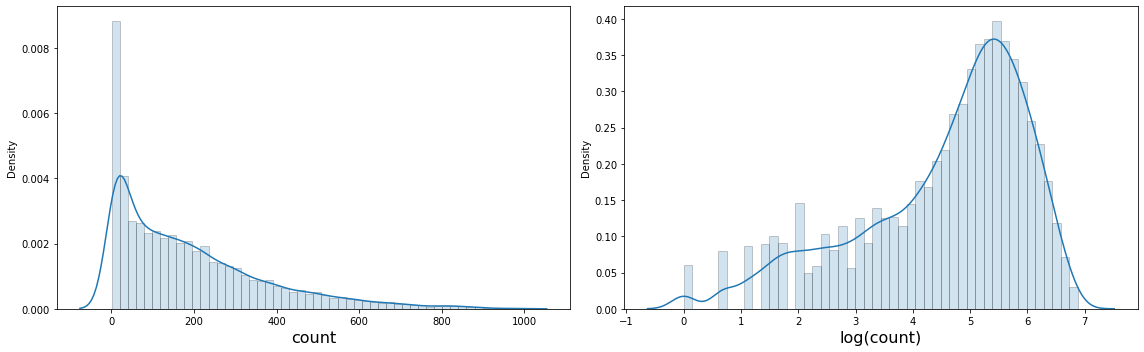

In [10]:
#Check count's distribution. We would need it to be normally distributed

hist_kws={'histtype': 'bar', 'edgecolor':'black', 'alpha': 0.2}

fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
sns.distplot(df['cnt'], ax=ax[0], hist_kws=hist_kws)
sns.distplot(np.log(df['cnt']), ax=ax[1], hist_kws=hist_kws)
ax[0].set_xlabel('count', fontsize=16)
ax[1].set_xlabel('log(count)', fontsize=16)
plt.tight_layout()
plt.show()


In the above plot, we see that  cnt is prominently skewed right. The log tranform looks normally distributed- Lets conduct the Shapiro-Wilk test to prove it.

In [11]:

# Proof of non-normality: Shapiro Wilk Test
#null hypothesis: sample is gaussian
stat, p = stats.shapiro(np.log(df['cnt']))
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05

if p > alpha:
	print('Sample looks Gaussian ')
else:
	print('Sample does not look Gaussian')

Statistics=0.920, p=0.000
Sample does not look Gaussian


Log transform is not normally distributed, so linear regression models may fail.

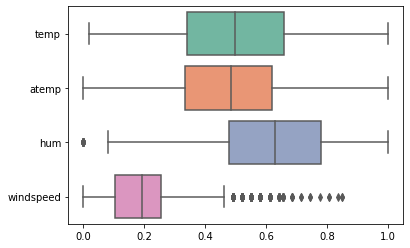

In [12]:
#Check outliers


features = ['temp','atemp','hum','windspeed']

ax = sns.boxplot(data=df[features], orient="h", palette="Set2")

Many outliers in windspeed, a few in humidity. Get rid of outliers by checking the maximum values

In [13]:
#Windspeed
df.sort_values(by='windspeed', ascending= False).head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
4315,3,0,7,17,0,0,0,3,0.80,0.7424,0.49,0.8507,181,177,358
4316,3,0,7,18,0,0,0,3,0.80,0.7424,0.49,0.8507,74,107,181
5635,3,0,8,17,0,6,0,3,0.64,0.5758,0.89,0.8358,2,14,16
9956,1,1,2,21,0,5,1,1,0.42,0.4242,0.35,0.8060,1,151,152
1259,1,0,2,15,0,5,1,1,0.46,0.4545,0.41,0.8060,5,50,55
1017,1,0,2,1,0,2,1,1,0.30,0.2424,0.42,0.7761,0,5,5
1261,1,0,2,17,0,5,1,1,0.32,0.2727,0.49,0.7463,8,181,189
1125,1,0,2,15,0,6,0,1,0.44,0.4394,0.16,0.7463,84,87,171
9653,1,1,2,4,0,0,0,2,0.10,0.0455,0.46,0.7164,0,1,1
11024,2,1,4,12,0,1,1,1,0.54,0.5152,0.28,0.7164,94,186,280


In [14]:
df[df['windspeed']>0.5].count()

season        230
yr            230
mnth          230
hr            230
holiday       230
weekday       230
workingday    230
weathersit    230
temp          230
atemp         230
hum           230
windspeed     230
casual        230
registered    230
cnt           230
dtype: int64

230 values in the table correspond to the outliers in the boxplot. Maximum values occur in the same day, which could have been a storm. Keep all values of this field.

In [15]:
df.sort_values(by='hum', ascending=True).head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1565,1,0,3,16,0,4,1,3,0.42,0.4242,0.0,0.2537,1,20,21
1570,1,0,3,21,0,4,1,3,0.36,0.3485,0.0,0.2239,1,27,28
1568,1,0,3,19,0,4,1,3,0.44,0.4394,0.0,0.5821,5,51,56
1567,1,0,3,18,0,4,1,3,0.44,0.4394,0.0,0.3582,2,80,82
1566,1,0,3,17,0,4,1,2,0.44,0.4394,0.0,0.3881,2,109,111
1564,1,0,3,15,0,4,1,3,0.44,0.4394,0.0,0.2239,3,11,14
1563,1,0,3,14,0,4,1,3,0.44,0.4394,0.0,0.2985,0,12,12
1562,1,0,3,13,0,4,1,3,0.42,0.4242,0.0,0.2239,1,11,12
1561,1,0,3,12,0,4,1,3,0.42,0.4242,0.0,0.2239,4,30,34
1571,1,0,3,22,0,4,1,2,0.34,0.3333,0.0,0.1343,4,30,34


In [16]:
df[df['hum'] == 0.0].count()

season        22
yr            22
mnth          22
hr            22
holiday       22
weekday       22
workingday    22
weathersit    22
temp          22
atemp         22
hum           22
windspeed     22
casual        22
registered    22
cnt           22
dtype: int64

Delete the 22 values with 0 humidity

In [17]:
df = df[df['hum']>0.0]
df.sort_values(by='hum', ascending=True).head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1109,1,0,2,23,0,5,1,1,0.52,0.5000,0.08,0.2836,16,61,77
1108,1,0,2,22,0,5,1,1,0.54,0.5152,0.10,0.2537,19,88,107
1110,1,0,2,0,0,6,0,1,0.48,0.4697,0.12,0.4925,6,23,29
1112,1,0,2,2,0,6,0,1,0.44,0.4394,0.13,0.3881,3,14,17
1113,1,0,2,3,0,6,0,1,0.42,0.4242,0.14,0.2985,0,7,7
1111,1,0,2,1,0,6,0,1,0.46,0.4545,0.14,0.4179,10,21,31
1124,1,0,2,14,0,6,0,1,0.46,0.4545,0.15,0.6567,102,94,196
1115,1,0,2,5,0,6,0,1,0.40,0.4091,0.15,0.3284,0,3,3
1006,1,0,2,14,0,1,1,1,0.60,0.5909,0.15,0.4925,14,76,90
1114,1,0,2,4,0,6,0,1,0.40,0.4091,0.15,0.3284,0,3,3


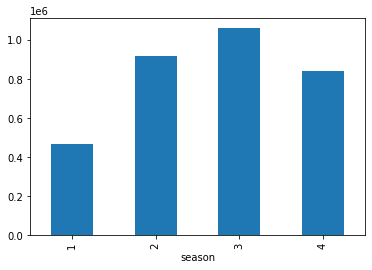

In [18]:
#Check Season Distribution
df.groupby(['season'])['cnt'].sum().plot(kind='bar')

Fall has the most rentals

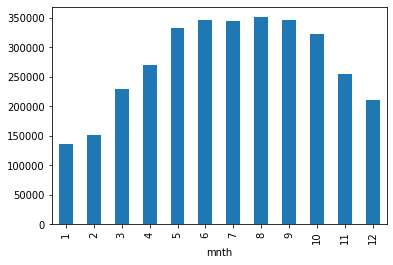

In [19]:
#Check month Distribution 
df.groupby(['mnth'])['cnt'].sum().plot(kind='bar')

June-September has the most bike rentals

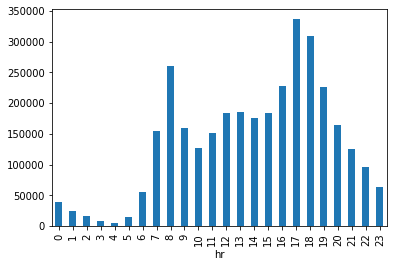

In [20]:
#Check hour Distribution 
df.groupby(['hr'])['cnt'].sum().plot(kind='bar')

Bikes are rent the most during 8am and 6-7 pm. This corresponds to normal working hours.

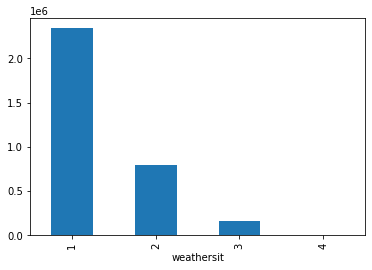

In [21]:
#Check weather Distribution 
df.groupby(['weathersit'])['cnt'].sum().plot(kind='bar')

Label 1 indicates clear weather

In [22]:
#Affect of Holidays
df.groupby(['holiday'])['cnt'].sum()

holiday
0    3213621
1      78435
Name: cnt, dtype: int64

In [23]:
#Affect of working days
df.groupby(['workingday'])['cnt'].sum()

workingday
0    1000269
1    2291787
Name: cnt, dtype: int64

Less rentals during the holidays, and more during workdays

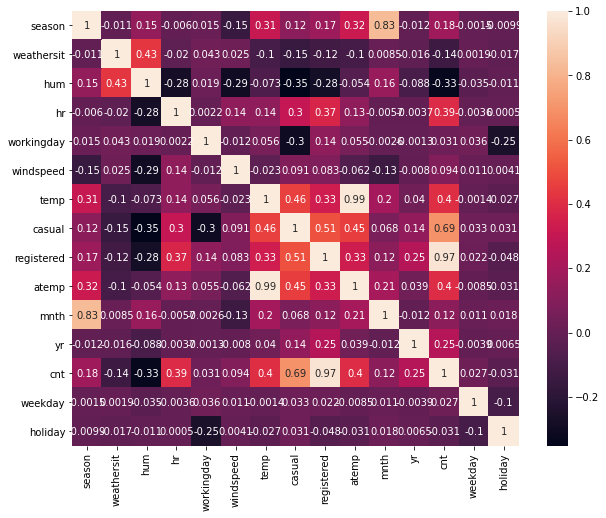

In [24]:
#Correlation Matrix

plt.figure(figsize=(10, 8))
numerical = list(set(df.columns))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix,annot=True)

cnt is highly correlated with hrs, casual, temperature and all other features which represent weather conditions. What is surprising is a weak correlation with weekday and working day. 

There is an almost linear relation between cnt and registered, since cnt is consist of registered and casual, we can drop these features

## Modelling

In [25]:
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
#One Hot Encoding

features_to_encode = ['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']

def one_hot(df, cols):
    for each in cols:
        dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
        df = pd.concat([df, dummies], axis=1)
    return df

In [27]:
df = df.drop(['casual', 'registered'], axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [28]:
#Log transform cnt
Y = np.log(df.iloc[:,-1])
Y.head()

0    2.772589
1    3.688879
2    3.465736
3    2.564949
4    0.000000
Name: cnt, dtype: float64

In [29]:
# One - hot encode 'categorical' features and drop the original one.

df_train = one_hot(df, features_to_encode)
df_train = df_train.drop(features_to_encode, axis=1)
df_train.head()

,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,yr_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.2879,0.81,0.0,16,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.2727,0.80,0.0,40,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.2727,0.80,0.0,32,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.2879,0.75,0.0,13,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.2879,0.75,0.0,1,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0


In [30]:
X = df_train.drop(['cnt'], axis=1)
X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3, random_state=4)


In [31]:
#Helper functions for model build

n_folds = 5
random_state = 4

def rmse_mae(model):
    
    kf = KFold(n_folds, shuffle=True, random_state=random_state).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    mae = np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_absolute_error", cv = kf))
    
    return rmse,mae

def beatiful_coef(coefs, feature_names=X.columns):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values('coef',
                                                  ascending=False)


def rmse(y_pred,y_true):
    result = np.sqrt(mean_squared_error(y_true,y_pred))
    
    return result

def regressions(model):
    
    model.fit(X_train,y_train)
    model_predict = model.predict(X_holdout)
    
    print('MAE : %f' % (mean_absolute_error(y_holdout, model_predict)))
    print('RMSE : %f' % (rmse(y_holdout, model_predict)))
    print('R2 : %f' % (r2_score(y_holdout, model_predict)))

In [32]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, Y, test_size=0.3,
random_state=random_state)    

# Cross validate model with Kfold stratified cross val

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=random_state))
ridge = make_pipeline(RobustScaler(), Ridge(alpha =0.0005, random_state=random_state))
forest = RandomForestRegressor(random_state=random_state)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                         learning_rate=0.05, max_depth=3, 
                         min_child_weight=1.7817, n_estimators=2200,
                         reg_alpha=0.4640, reg_lambda=0.8571,
                         subsample=0.5213,
                         random_state =7, nthread = -1)

In [33]:
score_lasso_rmse,score_lasso_mae = rmse_mae(lasso)
score_ridge_rmse,score_ridge_mae = rmse_mae(ridge)
score_forest_rmse,score_forest_mae = rmse_mae(forest)
score_xgb_rmse,score_xgb_mae = rmse_mae(model_xgb)
                                        
print("Lasso score RMSE: {:.4f} ({:.4f})\n".format(score_lasso_rmse.mean(), score_lasso_rmse.std()))
print("Ridge score RMSE: {:.4f} ({:.4f})\n".format(score_ridge_rmse.mean(), score_ridge_rmse.std()))
print("Random Forest score RMSE: {:.4f} ({:.4f})\n".format(score_forest_rmse.mean(), score_forest_rmse.std()))
print("Xgboost score RMSE: {:.4f} ({:.4f})\n".format(score_xgb_rmse.mean(), score_xgb_rmse.std()))

print("\nLasso score MAE: {:.4f} ({:.4f})\n".format(score_lasso_mae.mean(), score_lasso_mae.std()))
print("Ridge score MAE: {:.4f} ({:.4f})\n".format(score_ridge_mae.mean(), score_ridge_mae.std()))
print("Random Forest score MAE: {:.4f} ({:.4f})\n".format(score_forest_mae.mean(), score_forest_mae.std()))
print("Xgboost score MAE: {:.4f} ({:.4f})\n".format(score_xgb_mae.mean(), score_xgb_mae.std()))


Lasso score RMSE: 0.6225 (0.0130)

Ridge score RMSE: 0.6223 (0.0130)

Random Forest score RMSE: 0.3698 (0.0060)

Xgboost score RMSE: 0.3326 (0.0086)


Lasso score MAE: 0.6800 (0.0058)

Ridge score MAE: 0.6800 (0.0058)

Random Forest score MAE: 0.4949 (0.0043)

Xgboost score MAE: 0.4737 (0.0064)



In [34]:
regressions(lasso)

MAE : 0.469520
RMSE : 0.630174
R2 : 0.822239


In [35]:
regressions(ridge)

MAE : 0.469636
RMSE : 0.630125
R2 : 0.822267


In [36]:
regressions(forest)

MAE : 0.241140
RMSE : 0.369061
R2 : 0.939031


In [37]:
regressions(model_xgb)

MAE : 0.228399
RMSE : 0.341329
R2 : 0.947849


Random Forest and XGBoost outperform

In [38]:
# Modeling step Test different algorithms 

kfold = 5

# Cross validate model with Kfold stratified cross val
regressors = []

regressors.append(DecisionTreeRegressor(random_state=random_state))
regressors.append(AdaBoostRegressor(DecisionTreeRegressor(random_state=random_state)))
regressors.append(RandomForestRegressor(random_state=random_state))
regressors.append(ExtraTreesRegressor(random_state=random_state))
regressors.append(GradientBoostingRegressor(random_state=random_state))
regressors.append(BaggingRegressor(random_state=random_state))
regressors.append(make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=random_state)))
regressors.append(make_pipeline(RobustScaler(), Ridge(alpha =0.0005, random_state=random_state)))
regressors.append(xgb.XGBRegressor(random_state=random_state))

In [39]:
%%time

cv_results = []
for regressor in regressors :
    print(regressor)
    cv_results.append(-cross_val_score(regressor, X_train, y = y_train, scoring = "neg_mean_absolute_error", cv = kfold,n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=4, splitter='best')
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
  

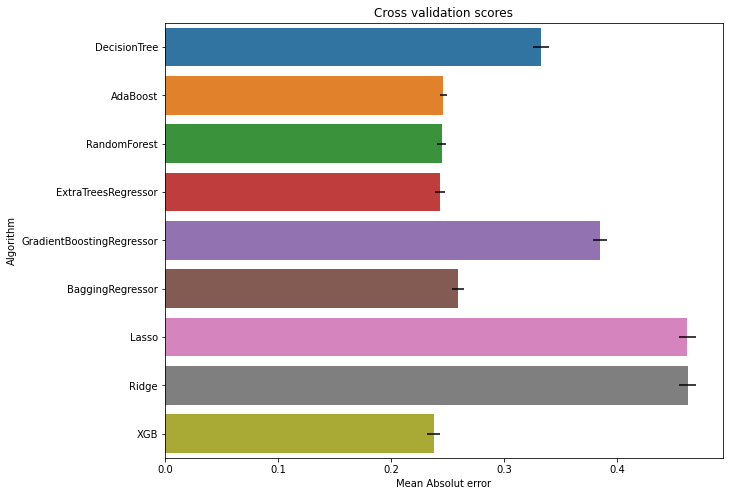

In [40]:
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree","AdaBoost",
"RandomForest","ExtraTreesRegressor","GradientBoostingRegressor","BaggingRegressor","Lasso","Ridge",'XGB']})
plt.figure(figsize=(10, 8))
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, **{'xerr':cv_std})
g.set_xlabel("Mean Absolut error")
g = g.set_title("Cross validation scores")

Best Score: XGBoost Model